In [17]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib
import os
import codecs
import imageio

#SAVE=True
SAVE=False

savedir = "/home/matti/Documents/images_for_mytoycode/prova_video/"

def find_angle_bubble(DrhoNx,DrhoNy,Nx,Ny,t):
    TH=0.1
    for j in range(Ny):
        my = np.max(DrhoNy[t,j,:])
        if(my>TH): 
            idx_my = j#, int(np.argmax(DrhoNy[t,j,:]))
            break
    for j in range(Ny-1,0,-1):
        My = np.min(DrhoNy[t,j,:])
        if(My<-TH): 
            idx_My = j#, int(np.argmax(DrhoNy[t,j,:]))
            break
    for i in range(Nx):
        mx = np.max(DrhoNx[t,:,i])
        if(mx>TH): 
            idx_mx = i#, int(np.argmax(DrhoNx[t,:,i])
            break
    for i in range(Nx-1,0,-1):
        Mx = np.min(DrhoNx[t,:,i])
        if(Mx<-TH): 
            idx_Mx = i#, int(np.argmax(DrhoNx[t,:,i]))
            break
    #print(idx_my, idx_mx); print(idx_My, idx_Mx)
    xx = (idx_mx,idx_Mx)
    yy = (idx_my,idx_My)
    A = np.arctan((xx[0]-xx[1])/(yy[0]-yy[1]))
    sincosA = np.cos(A)*np.sin(A)
    Ca = np.array([0.1,0.2,0.3])
    L=1
    Cs=5.6996
    R=16
    H=64
    D = Ca*sincosA*((19*L+16)/(8*(L+1)))*(1+Cs*((R/H)**3)*((2.5*L+1)/(L+1)))
    print(D)
    print("phi=%g, cos(phi)=%g, sin(phi)=%g, sin(phi)*cos(phi)=%g"%(A,np.cos(A),np.sin(A),sincosA))
    return Ca,D, yy, xx

def plotDCa(D,Ca):
    _ = plt.figure(98765)
    _ = plt.plot(Ca,D,'ro-',label='my shear bubble')
    _ = plt.ylabel('D'); _ = plt.xlabel('Ca'); _ = plt.legend()
    #_ = plt.savefig('/home/matti/Documents/images_for_mytoycode/shear_bubble_D_Cs')
        
def plotscal(f1, i, title):
    _ = plt.figure(i)
    _ = plt.contourf(f[i,:,:], 128)
    _ = plt.colorbar()
    _ = plt.title(title + " " + str(names[i]))

def plot_uy_prof(uy, Ny, i):
    _ = plt.figure(6666)
    _ = plt.plot(uy[i,int(Ny*0.5),:])
    _ = plt.title(" uy prof at NY/2 ")

def plot3scal(f1, f2, f3, i, title1, title2, title3):
    n=1 ; COL=2 ; RIG=1
    fig = plt.figure(i, figsize=[n*8*COL,n*4.8*2*RIG])
    gs1 = fig.add_gridspec(RIG,COL,width_ratios=[1,0.05], wspace=0.1, left=0.05, right=0.3)#, hspace=0)
    axs1 = gs1.subplots()
    gs2 = fig.add_gridspec(RIG,COL,width_ratios=[1,0.05], wspace=0.1, left=0.37, right=0.63)#, hspace=0)
    axs2 = gs2.subplots()
    gs3 = fig.add_gridspec(RIG,COL,width_ratios=[1,0.05], wspace=0.1, left=0.7, right=0.95)#, hspace=0)
    axs3 = gs3.subplots()
    vm = np.min(f1[i,:,:]); vM = np.max(f1[i,:,:])
    C = axs1[0].contourf(f1[i,:,:], 128, vmin=vm, vmax=vM, cmap="viridis")
    _ = axs1[0].set_title(str(i) + ")  " + title1 + " step=" + str(names[i]))
    _ = matplotlib.colorbar.ColorbarBase(axs1[1], norm=matplotlib.colors.Normalize(vmin=vm, vmax=vM), cmap = C.cmap)
    vm = np.min(f2[i,:,:]); vM = np.max(f2[i,:,:])
    C = axs2[0].contourf(f2[i,:,:], 128, vmin=vm, vmax=vM, cmap="viridis")
    _ = axs2[0].set_title(str(i) + ")  " + title2 + " step=" + str(names[i]))
    _ = matplotlib.colorbar.ColorbarBase(axs2[1], norm=matplotlib.colors.Normalize(vmin=vm, vmax=vM), cmap = C.cmap)
    vm = np.min(f3[i,:,:]); vM = np.max(f3[i,:,:])
    C = axs3[0].contourf(f3[i,:,:], 128, vmin=vm, vmax=vM, cmap="viridis")
    _ = axs3[0].set_title(str(i) + ")  " + title3 + " step=" + str(names[i]))
    _ = matplotlib.colorbar.ColorbarBase(axs3[1], norm=matplotlib.colors.Normalize(vmin=vm, vmax=vM), cmap = C.cmap)
    if(SAVE):
        _ = plt.savefig(savedir+str(i))
        _ = plt.close()

def plot3scal_profilebubble(f1, rhoR, rhoB, f3, i, title1, title3,vmu,vMu):
    n=1 ; COL=2 ; RIG=1
    fig = plt.figure(i, figsize=[n*8*COL,n*8*RIG])
    gs1 = fig.add_gridspec(RIG,COL,width_ratios=[1,0.05], wspace=0.1, left=0.05, right=0.3)#, hspace=0)
    axs1 = gs1.subplots()
    gs2 = fig.add_gridspec(RIG,RIG,left=0.37, right=0.63)#, hspace=0)
    axs2 = gs2.subplots()
    gs3 = fig.add_gridspec(RIG,COL,width_ratios=[1,0.05], wspace=0.1, left=0.7, right=0.95)#, hspace=0)
    axs3 = gs3.subplots()
    vm = np.min(f1[i,:,:]); vM = np.max(f1[i,:,:])
    C = axs1[0].contourf(f1[i,:,:], 128, vmin=vm, vmax=vM, cmap="viridis")
    _ = axs1[0].set_title(str(i) + ")  " + title1 + " step=" + str(names[i]))
    _ = matplotlib.colorbar.ColorbarBase(axs1[1], norm=matplotlib.colors.Normalize(vmin=vm, vmax=vM), cmap = C.cmap)
    X = int(Nx*0.5)
    _ = axs2.plot(rhoR[i,:,X],color='red',label='bubble')
    _ = axs2.plot(rhoB[i,:,X],color='blue',label='fluid')
    _ = axs2.legend()
    _ = axs2.set_title(str(i) + ") rhoR & rhoB at x="+str(X)+"  step=" + str(names[i]))
    _ = axs2.set_xlabel('y')
    C = axs3[0].contourf(f3[i,:,:], 128, vmin=vmu, vmax=vMu, cmap="bwr")
    _ = axs3[0].set_title(str(i) + ")  " + title3 + " step=" + str(names[i]))
    _ = matplotlib.colorbar.ColorbarBase(axs3[1], norm=matplotlib.colors.Normalize(vmin=vmu, vmax=vMu), cmap = C.cmap)
    if(SAVE):
        _ = plt.savefig(savedir+str(i))
        _ = plt.close()

def plotshear(f1, f2, i, xx, yy, title1, title2):
    n=1 ; COL=2 ; RIG=1
    #fig = plt.figure(i, figsize=[n*4.8*COL,n*4.8*RIG])
    fig = plt.figure(i, figsize=[n*12*COL,n*4*RIG])
    gs1 = fig.add_gridspec(RIG,COL,width_ratios=[1,0.05], wspace=0.1, left=0.05, right=0.48)#, hspace=0)
    axs1 = gs1.subplots()
    gs2 = fig.add_gridspec(RIG,COL,width_ratios=[1,0.05], wspace=0.1, left=0.52, right=0.95)#, hspace=0)
    axs2 = gs2.subplots()
    vm = np.min(f1[i,:,:]); vM = np.max(f1[i,:,:])
    C = axs1[0].contourf(f1[i,:,:], 128, vmin=vm, vmax=vM, cmap="viridis")
    _ = axs1[0].set_title(str(i) + ")  " + title1 + " step=" + str(names[i]))
    _ = matplotlib.colorbar.ColorbarBase(axs1[1], norm=matplotlib.colors.Normalize(vmin=vm, vmax=vM), cmap = C.cmap)
    #_ = axs1[0].hlines(yy, 10, Nx-10);
    #_ = axs1[0].vlines(xx, 10, Ny-10)
    #_ = axs1[0].plot(xx,yy,'r-')
    vm = np.min(f2[i,:,:]); vM = np.max(f2[i,:,:])
    C = axs2[0].contourf(f2[i,:,:], 128, vmin=vm, vmax=vM, cmap="viridis")
    _ = axs2[0].set_title(str(i) + ")  " + title2 + " step=" + str(names[i]))
    _ = matplotlib.colorbar.ColorbarBase(axs2[1], norm=matplotlib.colors.Normalize(vmin=vm, vmax=vM), cmap = C.cmap)
    if(SAVE):
        _ = plt.savefig(savedir+str(i))
        _ = plt.close()
        
def plotstress_interf(S, interf, i):
    n=1 ; COL=2 ; RIG=1
    fig = plt.figure(i, figsize=[n*4.8*COL,n*4.8*RIG])
    gs1 = fig.add_gridspec(RIG,COL,width_ratios=[1,0.05], wspace=0.1, left=0.05, right=0.45)#, hspace=0)
    axs1 = gs1.subplots()
    gs2 = fig.add_gridspec(RIG,COL,width_ratios=[1,0.05], wspace=0.1, left=0.55, right=0.95)#, hspace=0)
    axs2 = gs2.subplots()
    vm = np.min(S[i,:,0,:]); vM = np.max(S[i,:,0,:])
    C = axs1[0].contourf(S[i,:,0,:], 128, vmin=vm, vmax=vM, cmap="viridis")
    _ = axs1[0].set_title(str(i) + ")  STRESS step=" + str(names[i]))
    _ = matplotlib.colorbar.ColorbarBase(axs1[1], norm=matplotlib.colors.Normalize(vmin=vm, vmax=vM), cmap = C.cmap)
    vm = np.min(interf[i,:,:]); vM = np.max(interf[i,:,:])
    C = axs2[0].contourf(interf[i,:,:], 128, vmin=vm, vmax=vM, cmap="viridis")
    _ = axs2[0].set_title(str(i) + ")  DrhoNy step=" + str(names[i]))
    _ = matplotlib.colorbar.ColorbarBase(axs2[1], norm=matplotlib.colors.Normalize(vmin=vm, vmax=vM), cmap = C.cmap)
    if(SAVE):
        _ = plt.savefig(savedir+str(i))
        _ = plt.close()

def plotfield(fx, fy, field, i):
    fac=1
    mod = fx*fx+fy*fy
    x,y = np.meshgrid(np.linspace(0,Nx-1,int(Nx/fac)),np.linspace(0,Ny-1,int(Nx/fac)))
    _ = plt.figure(i, figsize=[16,14])
    _ = plt.contourf(mod[i,:,:], 255)
    _ = plt.contourf(field[i,:,:], 255)
    _ = plt.colorbar()
    _ = plt.quiver(x,y,fx[i,::fac,::fac],fy[i,::fac,::fac], scale=2)
    _ = plt.title(names[i])
    if(SAVE):
        _ = plt.savefig(savedir+str(i))
        _ = plt.close()

def plotbubbleprofilealongX(rhoR,rhoB,uy,i):
    n=1 ; COL=2 ; RIG=1
    fig = plt.figure(i, figsize=[n*4.8*COL,n*4.8*RIG])
    gs1 = fig.add_gridspec(RIG,COL)#, hspace=0)
    axs1 = gs1.subplots()
    _ = axs1[0].plot(rhoR[i,:,int(Nx/2)],color='red',label='bubble')
    _ = axs1[0].plot(rhoB[i,:,int(Nx/2)],color='blue',label='fluid')
    _ = axs1[0].legend()
    _ = axs1[0].set_title(str(i) + ")  rhoR & rhoB  step=" + str(names[i]))
    _ = axs1[1].plot(uy[i,:,int(Nx/2)],color='green')
    _ = axs1[1].set_title(str(i) + ")  uy  step=" + str(names[i]))
    #_ = plt.xlim(50, 160)
    if(SAVE):
        _ = plt.savefig(savedir+str(i))
        _ = plt.close()

def printtotmass():
    n=1 ; COL=2 ; RIG=1
    fig = plt.figure(98145, figsize=[n*5.6*COL,n*4.8*RIG])
    gs1 = fig.add_gridspec(RIG,COL)#, hspace=0)
    axs = gs1.subplots()
    _ = axs[0].semilogy(totmass[:,3],color='red',label='bubble')
    _ = axs[0].semilogy(totmass[:,4],color='blue',label='fluid')
    _ = axs[0].set_xlabel("T")
    _ = axs[0].legend()
    _ = axs[0].set_title("LOG - tot mass diff wrt init")
    _ = axs[1].plot(totmass[:,3],color='red',label='bubble')
    _ = axs[1].plot(totmass[:,4],color='blue',label='fluid')
    _ = axs[1].set_xlabel("T")
    _ = axs[1].legend()
    _ = axs[1].set_title("LIN - tot mass diff wrt init")
    #if(SAVE):
    #    _ = plt.savefig(savedir+"totmass")
    #    _ = plt.close()

def bubbleBAR():
    _ = plt.figure(917234)
    _ = plt.plot(bar[:,1])
    _ = plt.xlabel("T")
    _ = plt.ylabel("y_bar")

def check_decay(k2, vmax, th_nu, pointX, pointY):
    sol = np.zeros((T,))
    for t in range(T):
        sol[t] = vmax*np.e**(-th_nu*k2*(tempi[t]))
    plt.figure(789)
    plt.semilogy(tempi, ux[:,pointY,pointX], label='comp')
    plt.semilogy(tempi, sol, linestyle='--',label='sol')
    plt.xlim([0,5000])
    #plt.ylim([10**-3,10**-18])
    comp_nu = -(np.log(ux[0,pointY,pointX])-np.log(ux[T-1,pointY,pointX]))/(tempi[0]-tempi[T-1])/k2
    plt.legend()
    plt.title(r"$\nu_{comp}/\nu_{th}$ = %1.10f"%(comp_nu/th_nu))
    plt.figure(999)
    for t in range(T):
        plt.plot(ux[t,pointY,:])
    totmass()


500 6
[  0. 100. 200. 300. 400. 500.]
[0, 100, 200, 300, 400, 500]
128 256


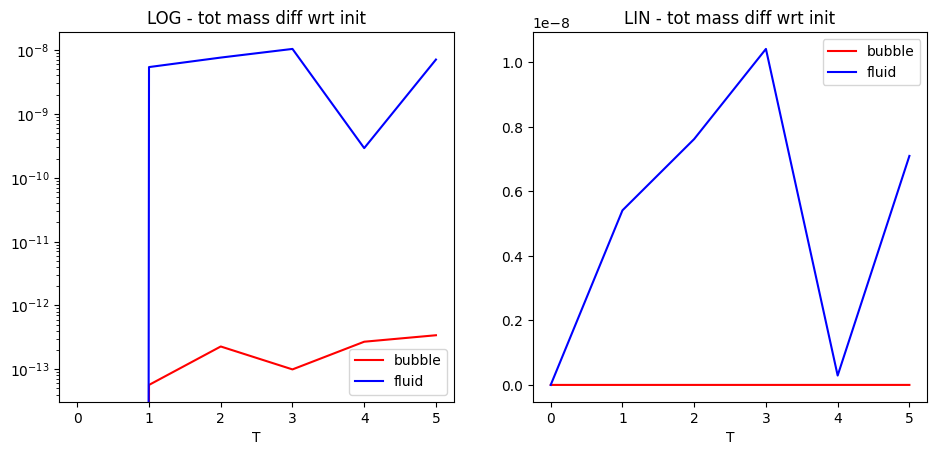

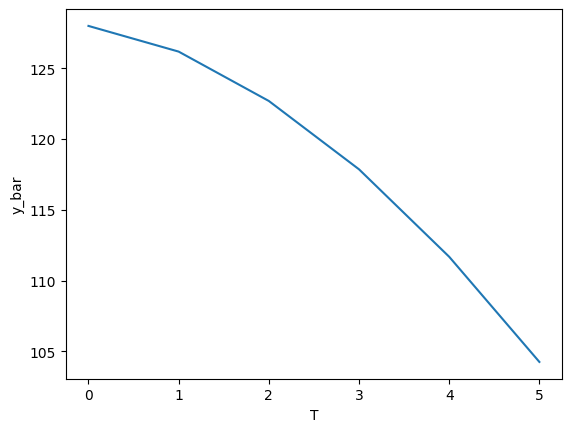

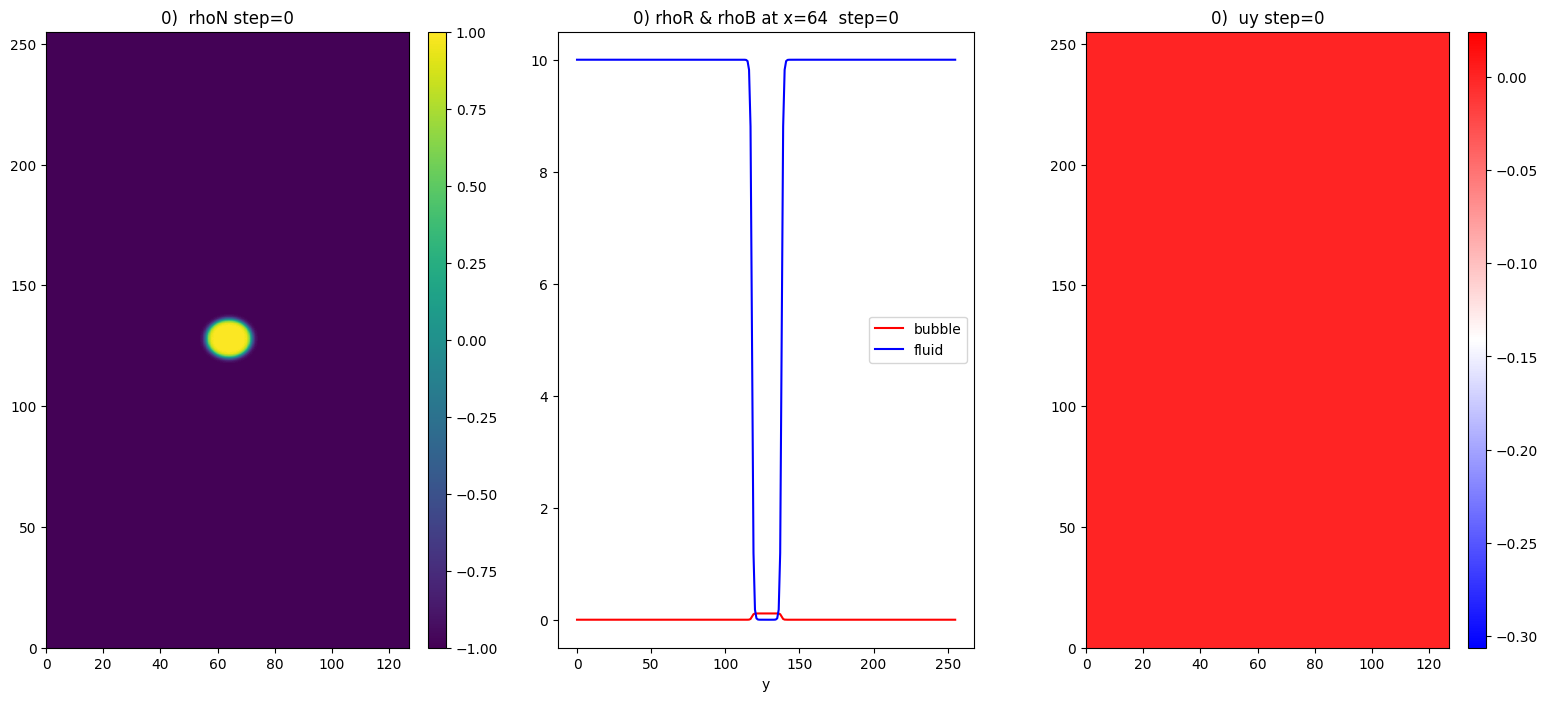

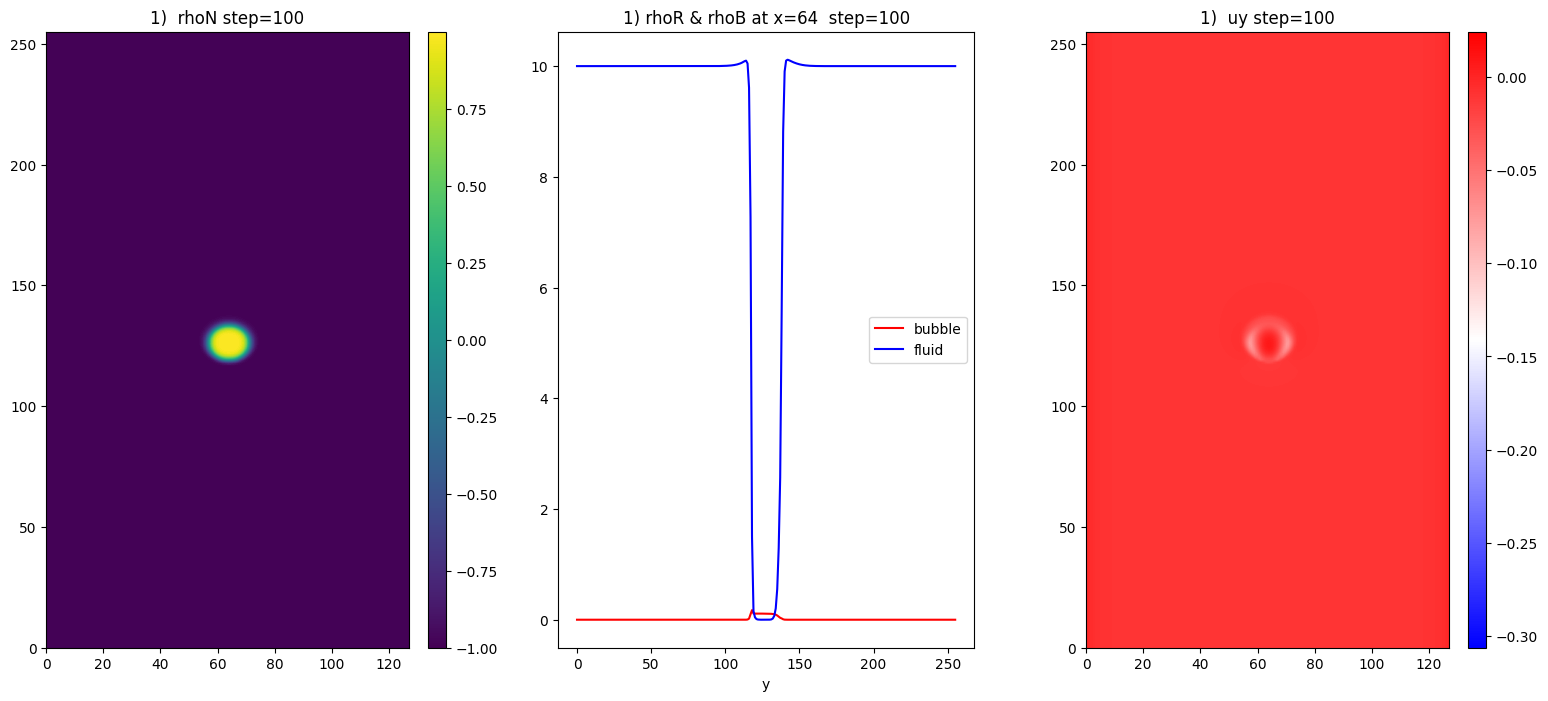

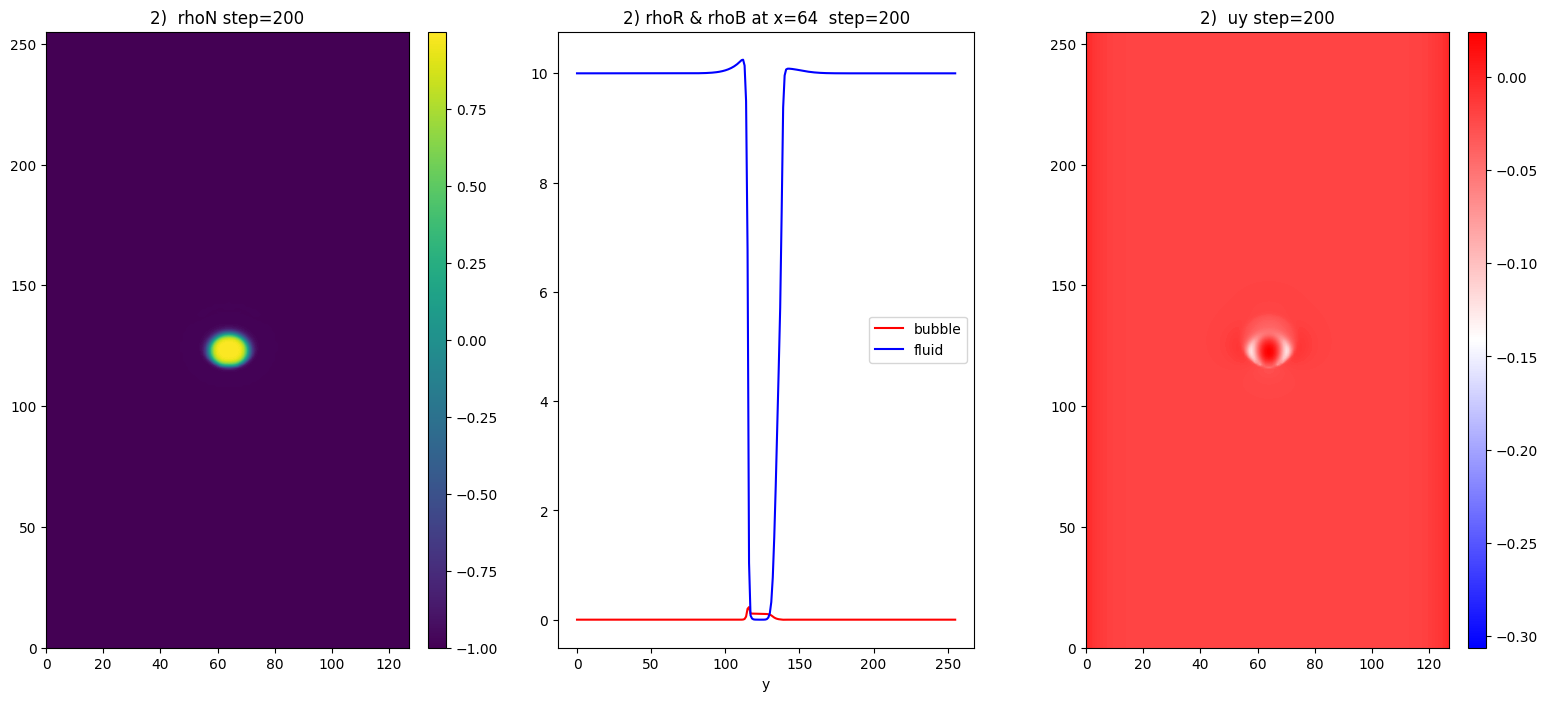

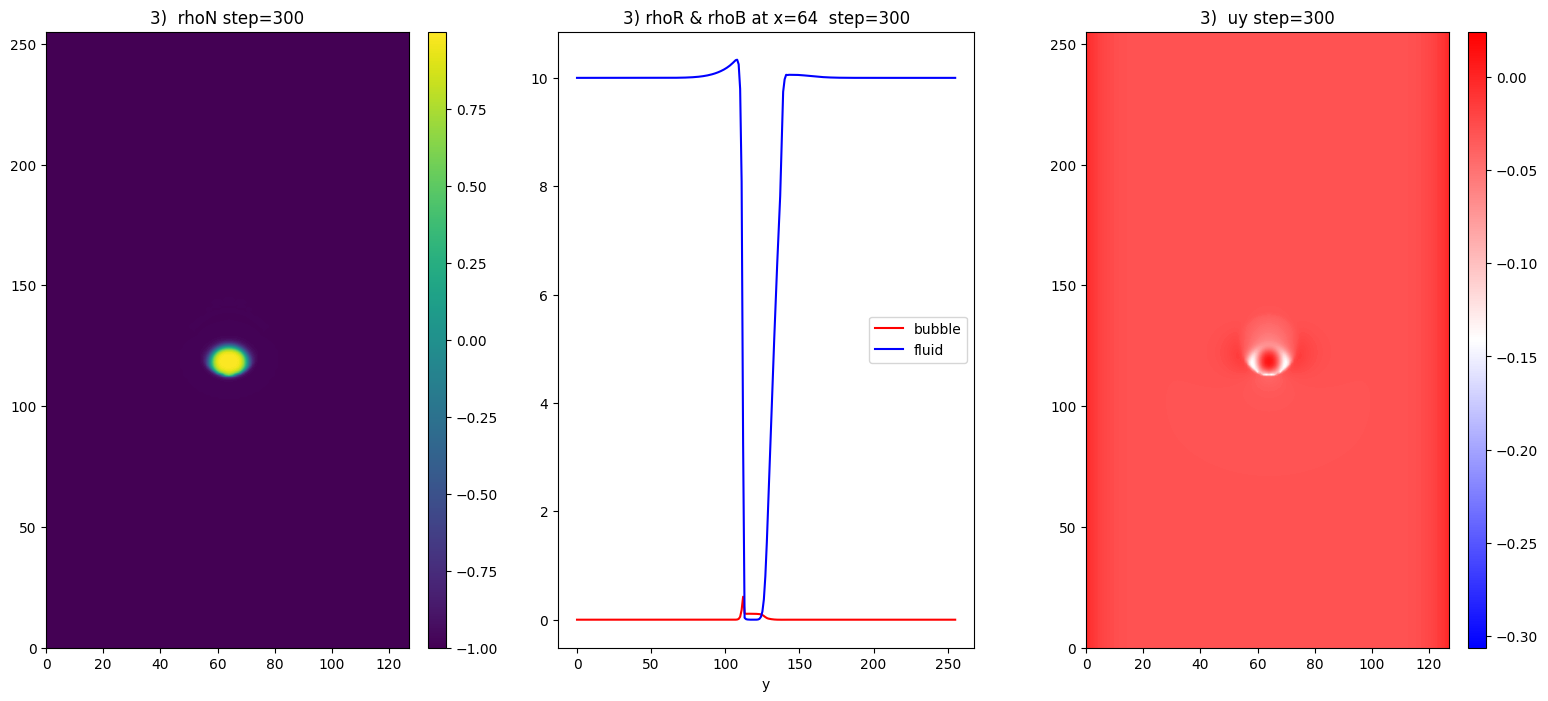

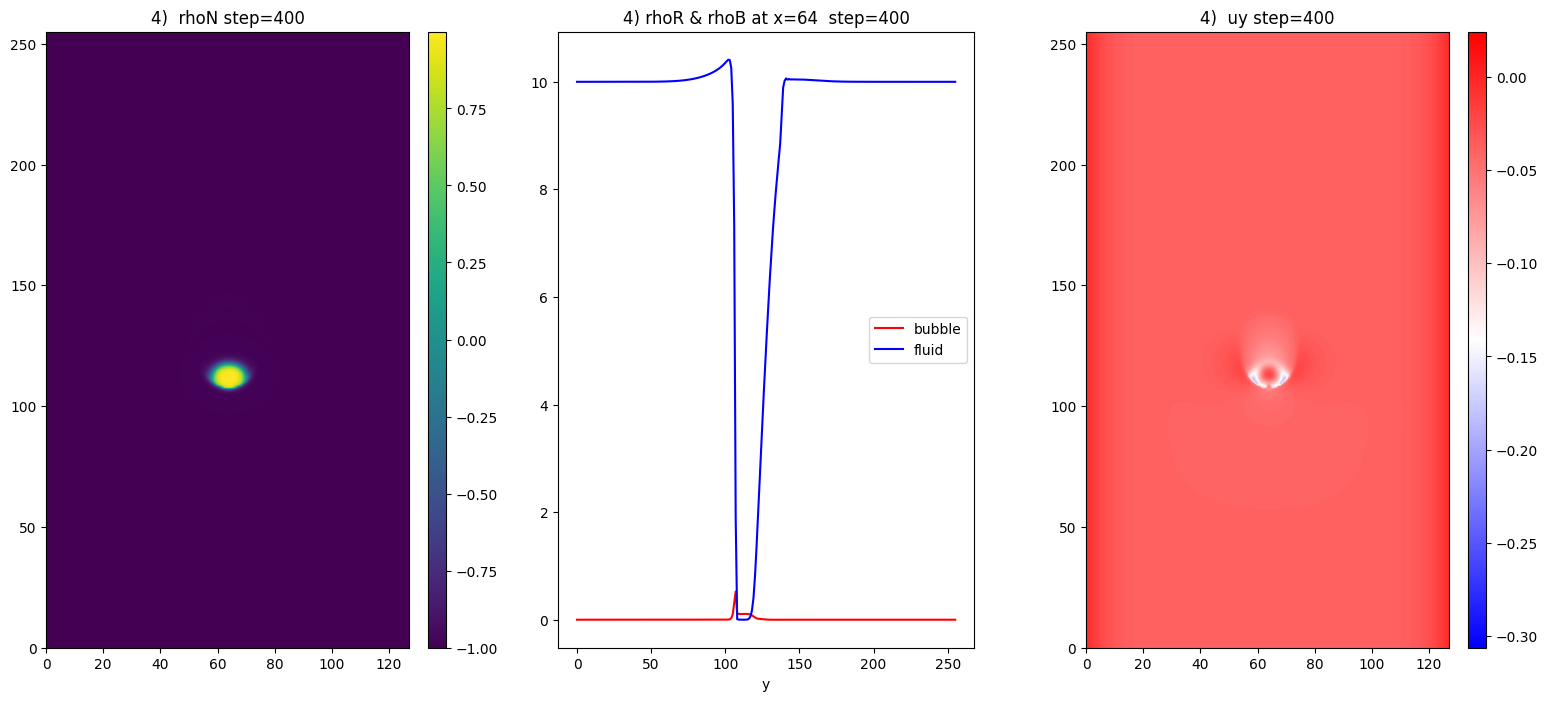

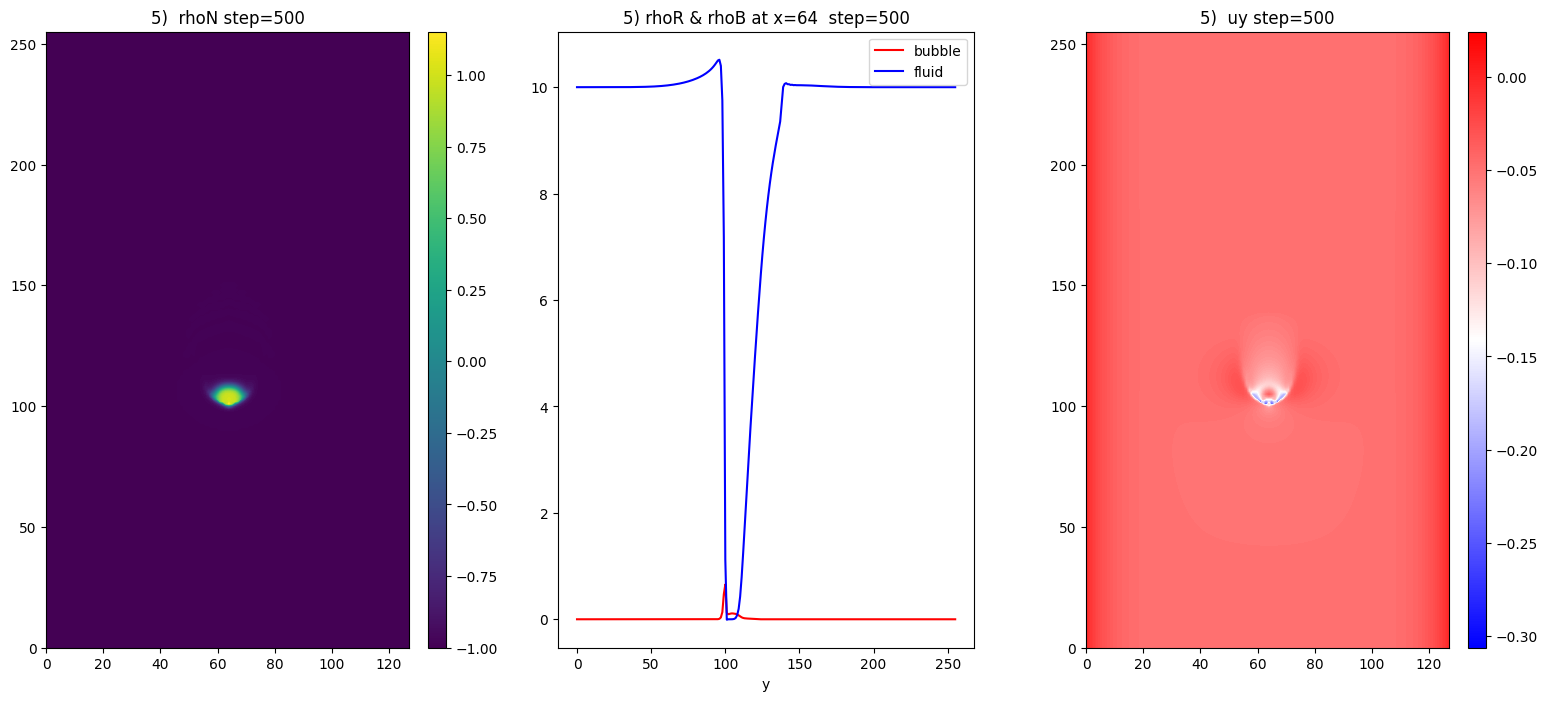

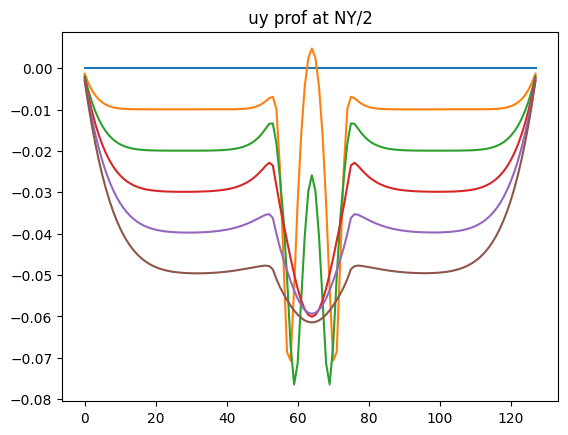

In [28]:
names=[]
directory='./output/'
arr = os.listdir(directory)
for i in arr:
    if(i[0:4]=='rhoR' and i[4]!="_"): 
        names.append(int(i[4:-4]))
names.sort()
tottime = names[-1]
T = len(names)
print(tottime, T)
tempi = np.linspace(0,tottime,T)
print(tempi)
n_rhoN=list(range(T)); n_rhoR=list(range(T)); n_rhoB=list(range(T)); n_ux=list(range(T)); n_uy=list(range(T)); n_DrhoNx=list(range(T)); n_DrhoNy=list(range(T)); n_stress=list(range(T))
for i in range(T):
    n_rhoN[i] = directory + "rhoN" + str(names[i]) + ".dat"
    n_rhoR[i] = directory + "rhoR" + str(names[i]) + ".dat"
    n_rhoB[i] = directory + "rhoB" + str(names[i]) + ".dat"
    n_ux[i] = directory + "ux" + str(names[i]) + ".dat"
    n_uy[i] = directory + "uy" + str(names[i]) + ".dat"
    n_DrhoNx[i] = directory + "DrhoNx" + str(names[i]) + ".dat"
    n_DrhoNy[i] = directory + "DrhoNy" + str(names[i]) + ".dat"
    n_stress[i] = directory + "stress" + str(names[i]) + ".dat"
print(names)

NXNY = np.zeros((2))
with codecs.open(directory+"NXNY.dat", encoding='utf-8-sig') as file:
    NXNY[:] = np.loadtxt(file)
Nx=int(NXNY[0])
Ny=int(NXNY[1])
del(NXNY)
print(Nx,Ny)

rhoN = np.zeros((T,Ny,Nx)); rhoR = np.zeros((T,Ny,Nx)); rhoB = np.zeros((T,Ny,Nx))
DrhoNx = np.zeros_like(rhoN); DrhoNy = np.zeros_like(rhoN)
ux = np.zeros_like(rhoN); uy = np.zeros_like(rhoN)
stress = np.zeros((T,Ny,Nx*4))
totmass = np.zeros((T,6))
bar = np.zeros((T,2))

def read_files(T, names, f):
    for i in range(T):
        with codecs.open(names[i], encoding='utf-8-sig') as file:
            f[i,:,:] = np.loadtxt(file)

read_files(T,n_rhoN,rhoN)
read_files(T,n_rhoR,rhoR)
read_files(T,n_rhoB,rhoB)
read_files(T,n_DrhoNy,DrhoNy)
read_files(T,n_DrhoNx,DrhoNx)
read_files(T,n_ux,ux)
read_files(T,n_uy,uy)
read_files(T,n_stress,stress)
stress = np.reshape(stress,(T,Ny,Nx,4))
with codecs.open(directory+"totmass.dat", encoding='utf-8-sig') as file:
    totmass[:,:] = np.loadtxt(file)
with codecs.open(directory+"BAR.dat", encoding='utf-8-sig') as file:
    bar[:,:] = np.loadtxt(file)

#Ca, D, yy, xx = find_angle_bubble(DrhoNx,DrhoNy,Nx,Ny,T-1)
#plotDCa(D,Ca)
vmu = np.min(uy[:,:,:]); vMu = np.max(uy[:,:,:])
printtotmass()

bubbleBAR()

#for i in range(8):
for i in range(0,T,int(T/5)):
#for i in range(T):
    #plotscal(divV, i)
    #plotstress_interf(stress, DrhoNy, i)
    #plot3scal(rhoN,DrhoNx,uy,i,'rhoN','DrhoNy','uy')
    plot3scal_profilebubble(rhoN,rhoR,rhoB,uy,i,'rhoN','uy',vmu,vMu)
    plot_uy_prof(uy,Ny,i)
    #plotshear(rhoN,ux,i,xx,yy,'rhoN','ux')
    #plotbubbleprofilealongX(rhoR,rhoB,uy,i)
    #plotfield(ux, uy, divV, i)


In [29]:
filenames=[]
for i in range(T):
    filenames.append(savedir+str(i)+".png")

# with imageio.get_writer(savedir+"movie.gif", mode='I') as writer:
#     for filename in filenames:
#         image = imageio.imread(filename)
#         writer.append_data(image)
        
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave(savedir+'movie.gif',images,loop=0,duration=0.2)

/tmp/ipykernel_13514/3054797377.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


In [25]:
filenames=[]
for i in range(T):
    filenames.append(savedir+str(i)+".png")
for filename in filenames:
    os.remove(filename)

10000 11
[    0.  1000.  2000.  3000.  4000.  5000.  6000.  7000.  8000.  9000.
 10000.]
[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]


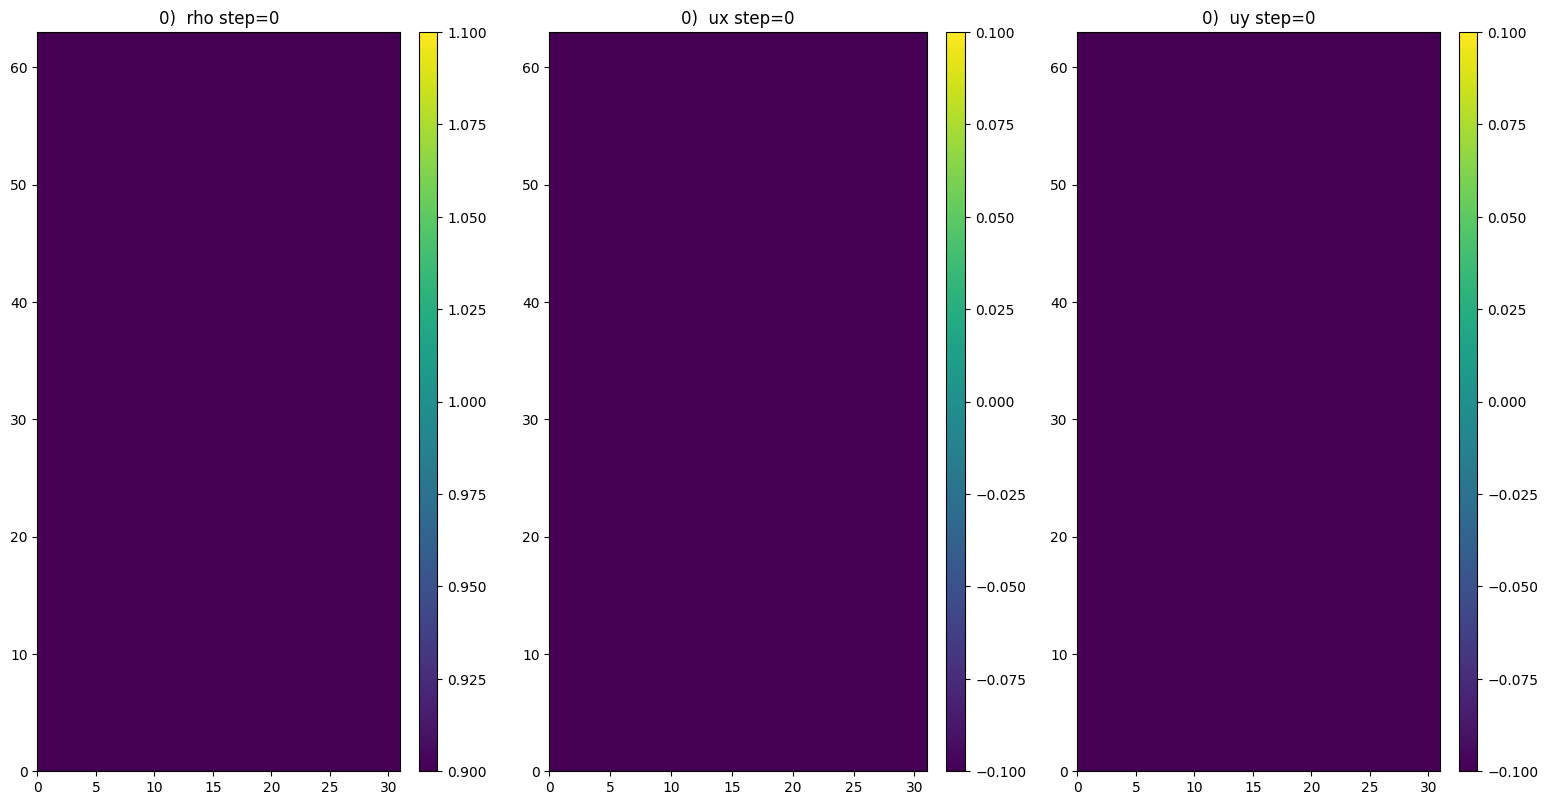

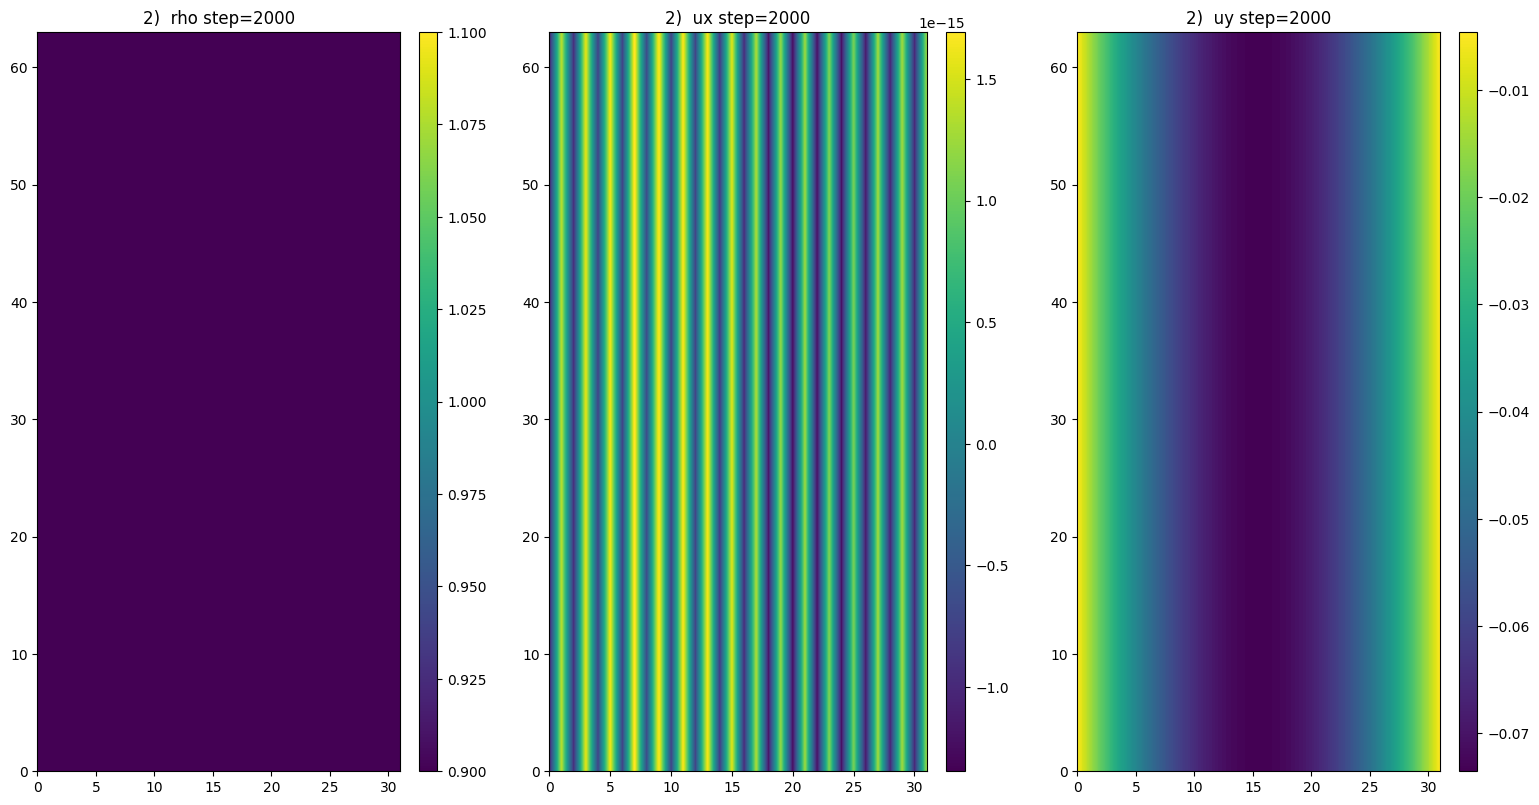

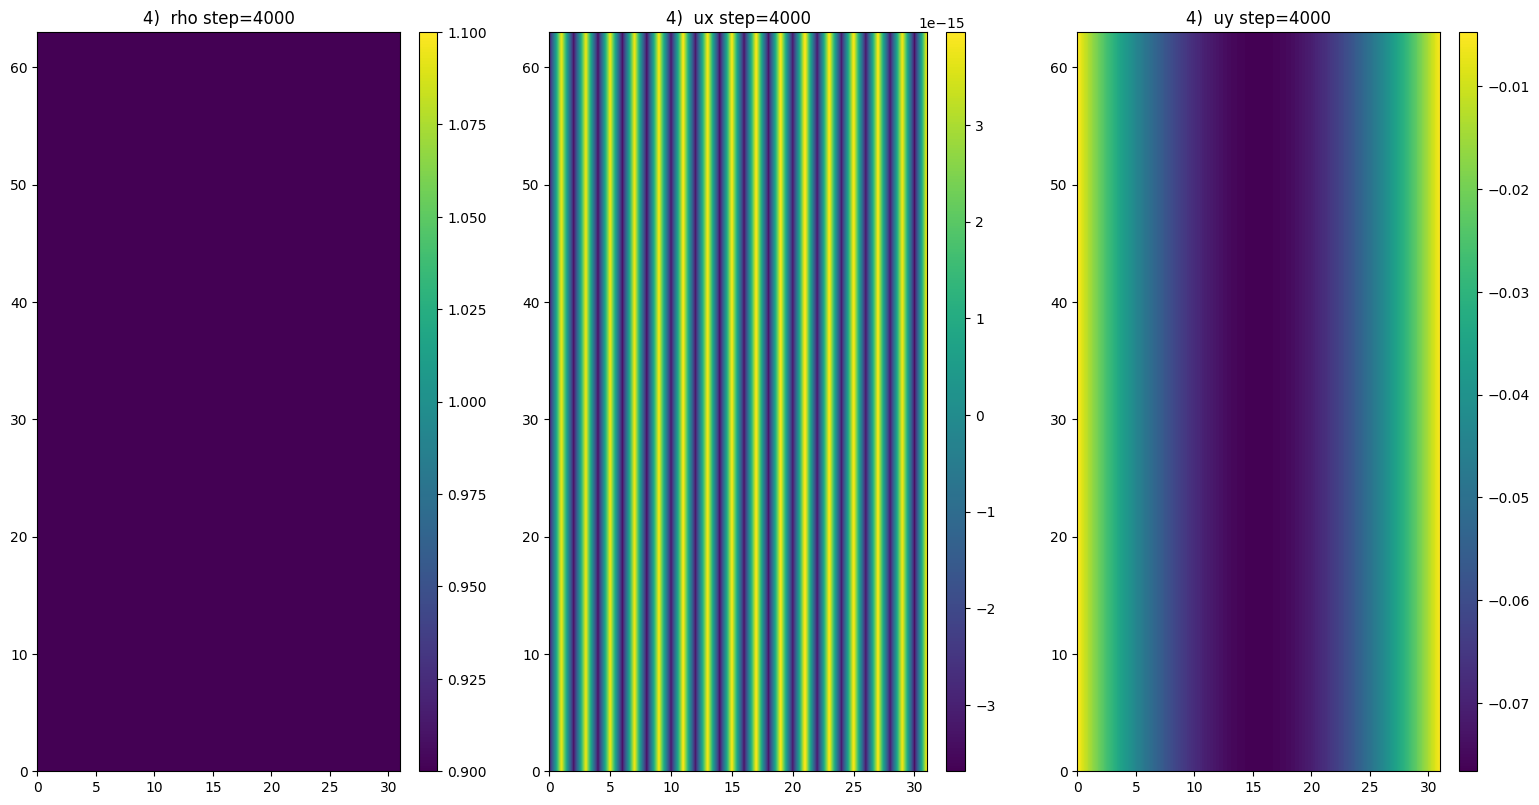

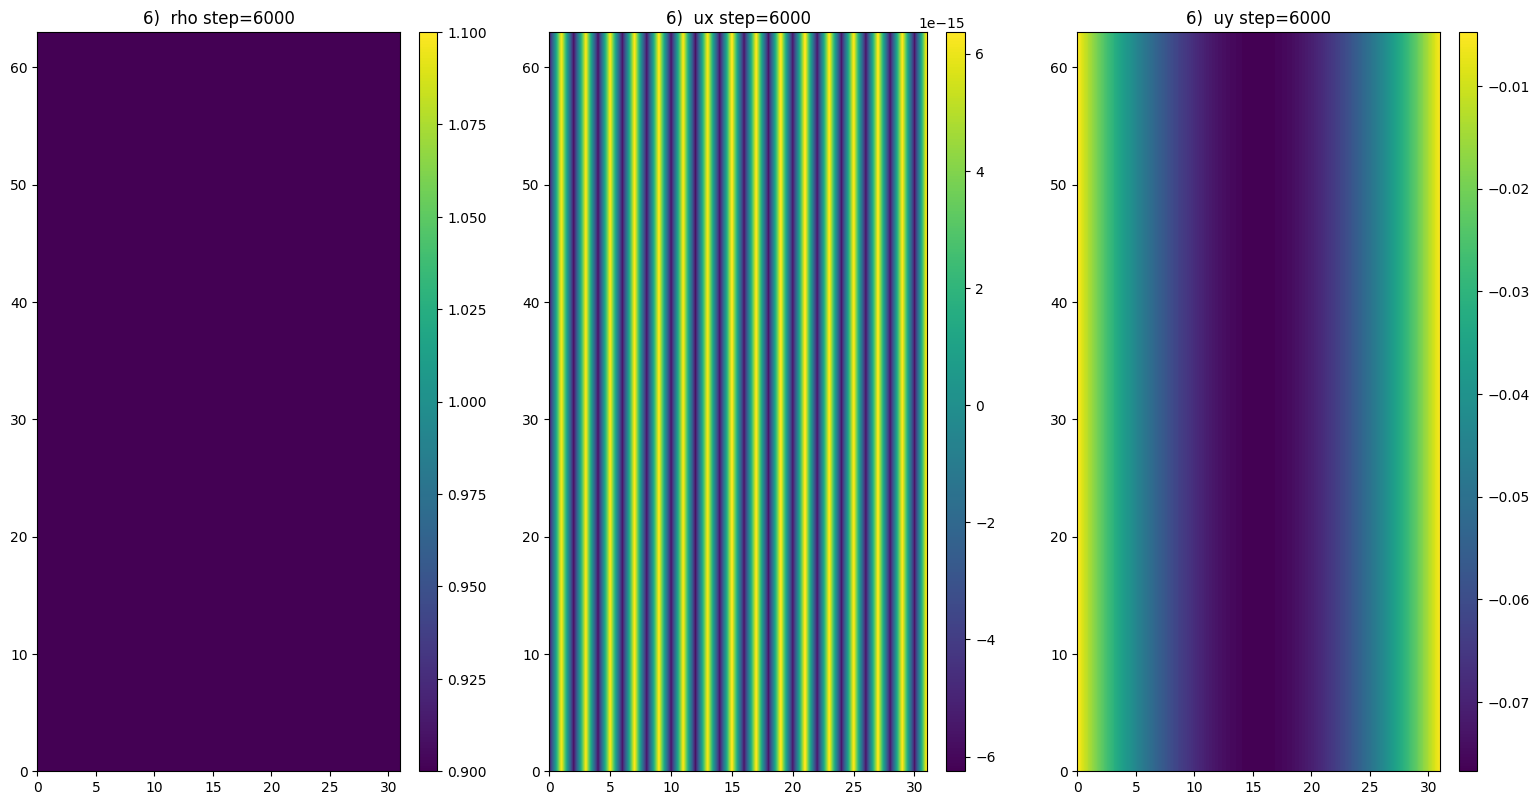

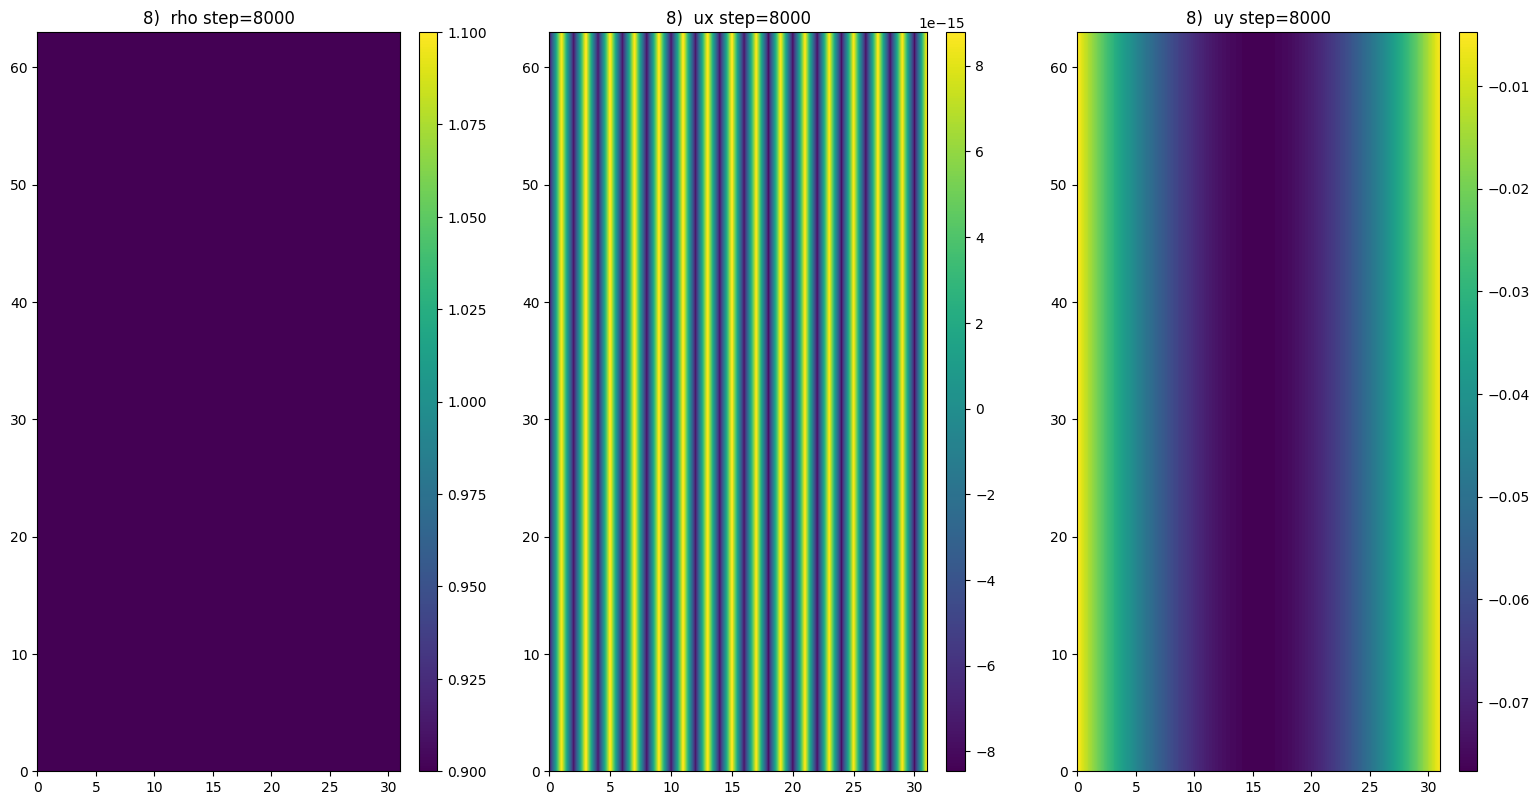

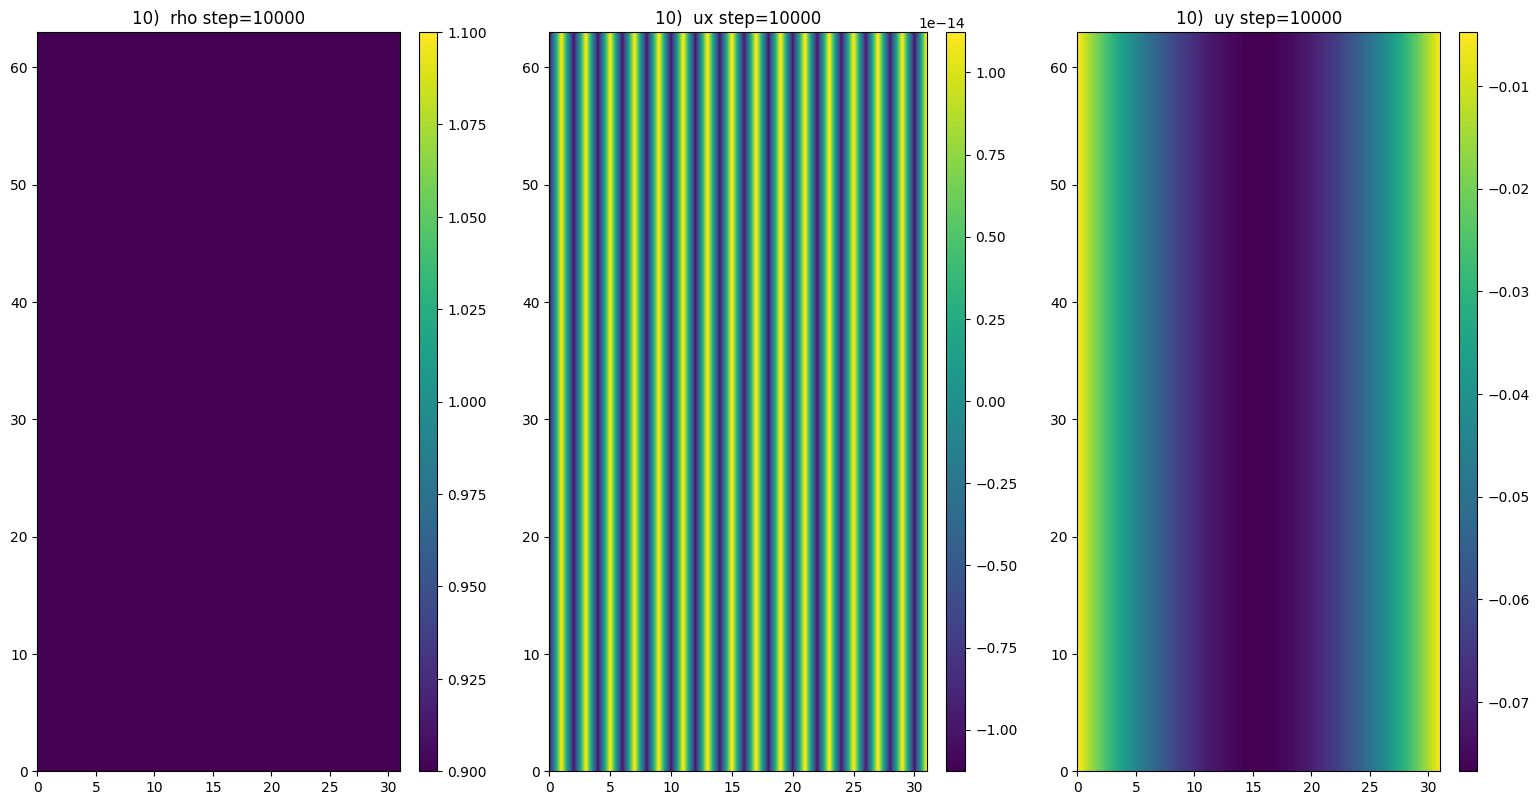

In [7]:
names=[]
directory='./output/'
arr = os.listdir(directory)
for i in arr:
    if(i[0:3]=='rho' and i[3]!="_"): 
        names.append(int(i[3:-4]))
names.sort()
tottime = names[-1]
T = len(names)
print(tottime, T)
tempi = np.linspace(0,tottime,T)
print(tempi)
n_rho=list(range(T)); n_ux=list(range(T)); n_uy=list(range(T)); n_stress=list(range(T))
for i in range(T):
    n_rho[i] = directory + "rho" + str(names[i]) + ".dat"
    n_ux[i] = directory + "ux" + str(names[i]) + ".dat"
    n_uy[i] = directory + "uy" + str(names[i]) + ".dat"
    n_stress[i] = directory + "stress" + str(names[i]) + ".dat"
print(names)

NXNY = np.zeros((2))
with codecs.open(directory+"NXNY.dat", encoding='utf-8-sig') as file:
    NXNY[:] = np.loadtxt(file)
Nx=int(NXNY[0])
Ny=int(NXNY[1])
del(NXNY)

rho = np.zeros((T,Ny,Nx))
ux = np.zeros_like(rho); uy = np.zeros_like(rho)
stress = np.zeros((T,Ny,Nx*4))
totmass = np.zeros((T,2))

def read_files(T, names, f):
    for i in range(T):
        with codecs.open(names[i], encoding='utf-8-sig') as file:
            f[i,:,:] = np.loadtxt(file)

read_files(T,n_rho,rho)
read_files(T,n_ux,ux)
read_files(T,n_uy,uy)
read_files(T,n_stress,stress)
stress = np.reshape(stress,(T,Ny,Nx,4))
with codecs.open(directory+"totmass.dat", encoding='utf-8-sig') as file:
    totmass[:,:] = np.loadtxt(file)

#Ca, D, yy, xx = find_angle_bubble(DrhoNx,DrhoNy,Nx,Ny,T-1)
#plotDCa(D,Ca)
vmu = np.min(uy[:,:,:]); vMu = np.max(uy[:,:,:])

#for i in range(8):
for i in range(0,T,int(T/5)):
#for i in range(T):
    #plotscal(divV, i)
    #plotstress_interf(stress, DrhoNy, i)
    plot3scal(rho,ux,uy,i,'rho','ux','uy')
    #plot3scal_profilebubble(rhoN,rhoR,rhoB,uy,i,'rhoN','uy',vmu,vMu)
    #plotshear(rhoN,ux,i,xx,yy,'rhoN','ux')
    #plotbubbleprofilealongX(rhoR,rhoB,uy,i)
    #plotfield(ux, uy, divV, i)


In [ ]:
'''
import h5py as h5
import numpy as np
import matplotlib.pylab as plt
import matplotlib
import os
import codecs
%matplotlib widget

def Div(fx,fy,T,Nx,Ny):
    Fnx = Nx
    Fny = int(Ny*0.5) + 1
    Ffx = np.zeros((T,Fnx,Fny), dtype=complex)
    Ffy = np.zeros((T,Fnx,Fny), dtype=complex)
    for t in range(T):
        Ffx[t,:,:] = np.fft.rfftn(fx[t,:,:])
        Ffy[t,:,:] = np.fft.rfftn(fy[t,:,:])
    kx = np.zeros(Fnx, dtype=int) 
    ky = np.zeros(Fny, dtype=int)
    for i in range(0,Fny):
        kx[i]=i
        ky[i]=i
    for i in range(Fny,Fnx):
        kx[i]=-Fnx+i   
    I=0-1j; #COL MENO É GIUSTO
    div = np.zeros((T,Nx,Ny))
    for t in range(T):   
        div[t,:,:] = np.fft.irfftn( (ky*Ffy[t,:,:] + np.transpose((kx*np.transpose(Ffx[t,:,:],(1,0))),(1,0))*I ))
    return div
    
names=[]
arr = os.listdir('.')
for i in arr:
    if(i[0:6]=='output'): 
        names.append(int(i[6:-3]))
names.sort()
tottime = names[-1]
T = len(names)
print(tottime, T)
tempi = np.linspace(0,tottime,T)
print(tempi)
for i in range(T):
    names[i] = "output" + str(names[i]) + ".h5"
print(names)

file = h5.File(names[0], "r"); d=0
for key in file.keys():
   d=d+1
   print('dataset %s = '%d,key)
Nx = int(file.attrs["NX"][0])
Ny = int(file.attrs["NY"][0])
print(Nx, Ny)
file.close()

rho = np.zeros((T,Nx,Ny))
ux = np.zeros_like(rho)
uy = np.zeros_like(rho)
for i in range(T):
    file = h5.File(names[i], "r")
    rho[i,:,:] = file.get("/rho")[...]
    ux[i,:,:] = file.get("/ux")[...]
    uy[i,:,:] = file.get("/uy")[...]
    file.close()

#divV = Div(ux, uy, T, Nx, Ny)